In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



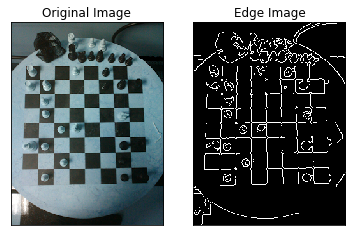

True

In [2]:
filename = "test_chess.png"
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged
# construct the argument parse and parse the arguments


# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 350)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)
	# show the images
#cv2.imshow("Original", image)
#cv2.imshow("Edges", np.hstack([wide, tight, auto]))
#cv2.waitKey(0)
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.hstack([auto]),cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
edges = np.hstack([auto])
#edges = np.hstack([wide])
plt.show()
#cv2.imwrite("auto_edged_only_1.png" , np.hstack([auto]))
cv2.imwrite("auto_edged_only_2.png" , np.hstack([auto]))
cv2.imwrite("wide_edged_only_2.png" , np.hstack([wide]))



Line count 26
houghlines3test_chess.png


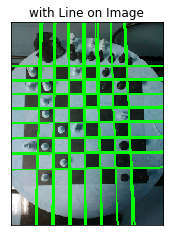

In [4]:
lines = cv2.HoughLines(edges,1,np.pi/180,80,16)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,80,maxLineGap=100)
print("Line count "+str(len(lines)))
image = cv2.imread(filename)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
terget_file = str("houghlines3"+filename)
print(terget_file)
cv2.imwrite(terget_file,image)
plt.subplot(121),plt.imshow(image)
plt.title('with Line on Image'), plt.xticks([]), plt.yticks([])
plt.show()